<a href="https://colab.research.google.com/github/nidhiparker333/Data-Analytics-Projects/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/amazon-alexa-reviews")

print("Path to dataset files:", path)
read_df= pd.read_csv(path)
read_df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/sid321axn/amazon-alexa-reviews/versions/3


IsADirectoryError: [Errno 21] Is a directory: '/root/.cache/kagglehub/datasets/sid321axn/amazon-alexa-reviews/versions/3'

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os


# Download latest version
path = kagglehub.dataset_download("sid321axn/amazon-alexa-reviews")

print("Path to dataset files:", path)

# Find the CSV  file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith((".csv", ".tsv")): # Check for both .csv and .tsv extensions
        csv_path = os.path.join(path, filename)
        break  # Stop searching once the first CSV or TSV file is found

# Read the file into a pandas DataFrame, handling both CSV and TSV
if csv_path.endswith(".csv"):
    reviews_df = pd.reviews_csv(csv_path)
elif csv_path.endswith(".tsv"):
    reviews_df = pd.read_csv(csv_path, sep='\t') # Use sep='\t' for TSV files
else:
    raise ValueError("No CSV or TSV file found in the downloaded directory.")

reviews_df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/sid321axn/amazon-alexa-reviews/versions/3


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [27]:

# Set plot style using Matplotlib
plt.style.use('fivethirtyeight')

# Additional tweaks to improve visibility (for better contrast in Colab)
sns.set(style="darkgrid")  # This gives a nice background grid for plots
plt.rcParams.update({
    'axes.labelsize': 12,       # Larger axis labels for better visibility
    'axes.titlesize': 14,       # Larger title font size
    'xtick.labelsize': 10,      # X-axis tick label size
    'ytick.labelsize': 10,      # Y-axis tick label size
    'figure.figsize': (10, 6)   # Default figure size for clarity
})



In [28]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [29]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<ipython-input-31-84864d60920b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=reviews_df, palette=colors)


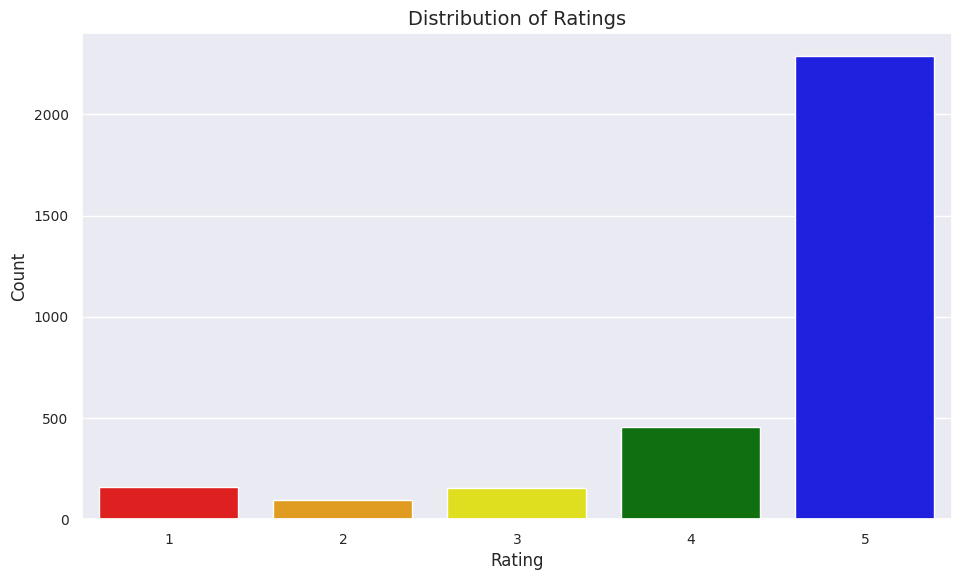

In [31]:

# Define a list of colors, one for each rating category
colors = ['red', 'orange', 'yellow', 'green', 'blue']  # Example colors

# Create the count plot with custom colors
ax = sns.countplot(x='rating', data=reviews_df, palette=colors)

# Optionally, add labels and title
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")

plt.show()

In [33]:
# Let's get the length of the verified_reviews column, handling NaN values
reviews_df['length'] = reviews_df['verified_reviews'].astype(str).apply(len)

In [34]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

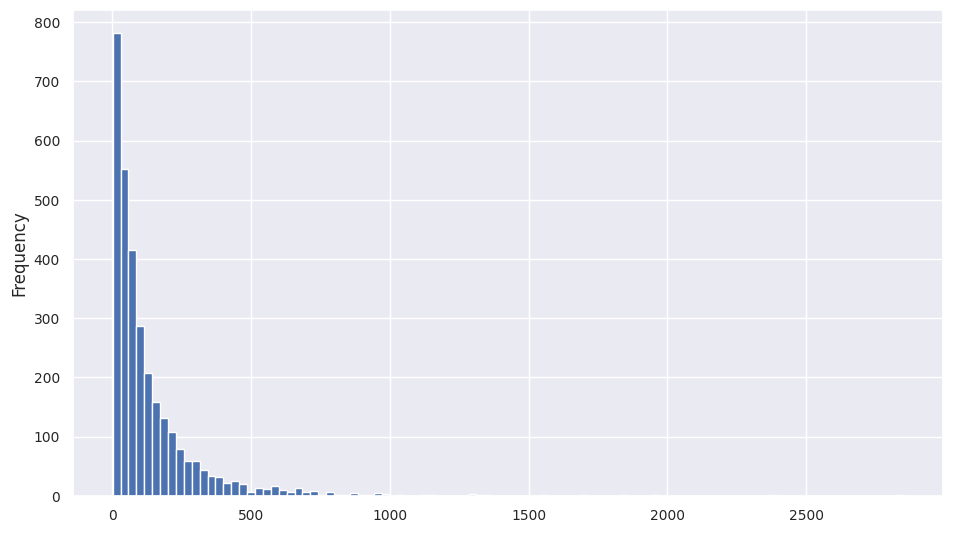

In [35]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [36]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049206
std,1.068506,0.273778,182.100176
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<ipython-input-38-fe48d2a4c2b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='feedback', data=reviews_df, palette=colors)


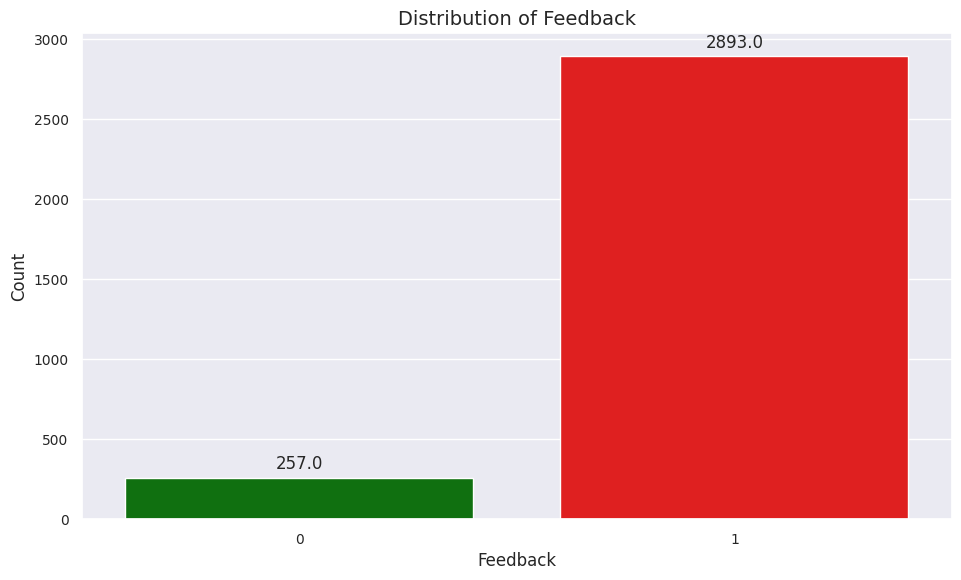

In [38]:

# Define custom colors for each feedback category
colors = ["green", "red"]  # Green for positive (1), red for negative (0)

# Create the countplot with custom colors
ax = sns.countplot(x='feedback', data=reviews_df, palette=colors)

# Add labels and title
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.title("Distribution of Feedback")

# annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [39]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [40]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [41]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [42]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)

In [43]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

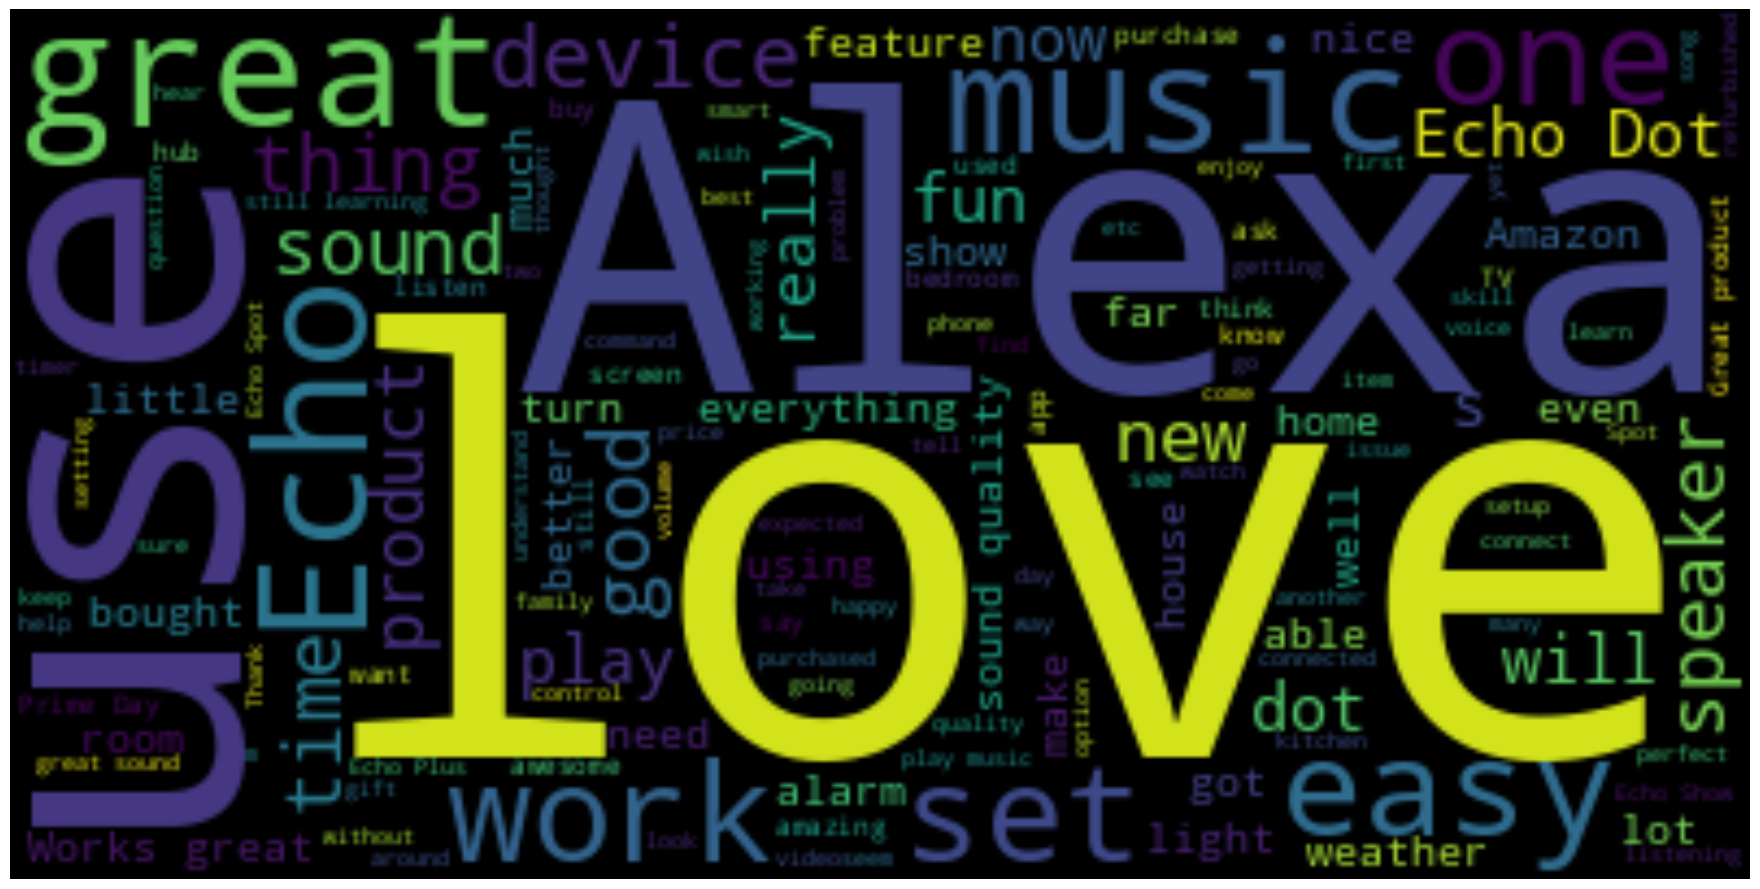

In [47]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))

# Generate the word cloud
wordcloud = WordCloud().generate(sentences_as_one_string)

# Display the word cloud without the axis
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis to remove the grid

plt.show()

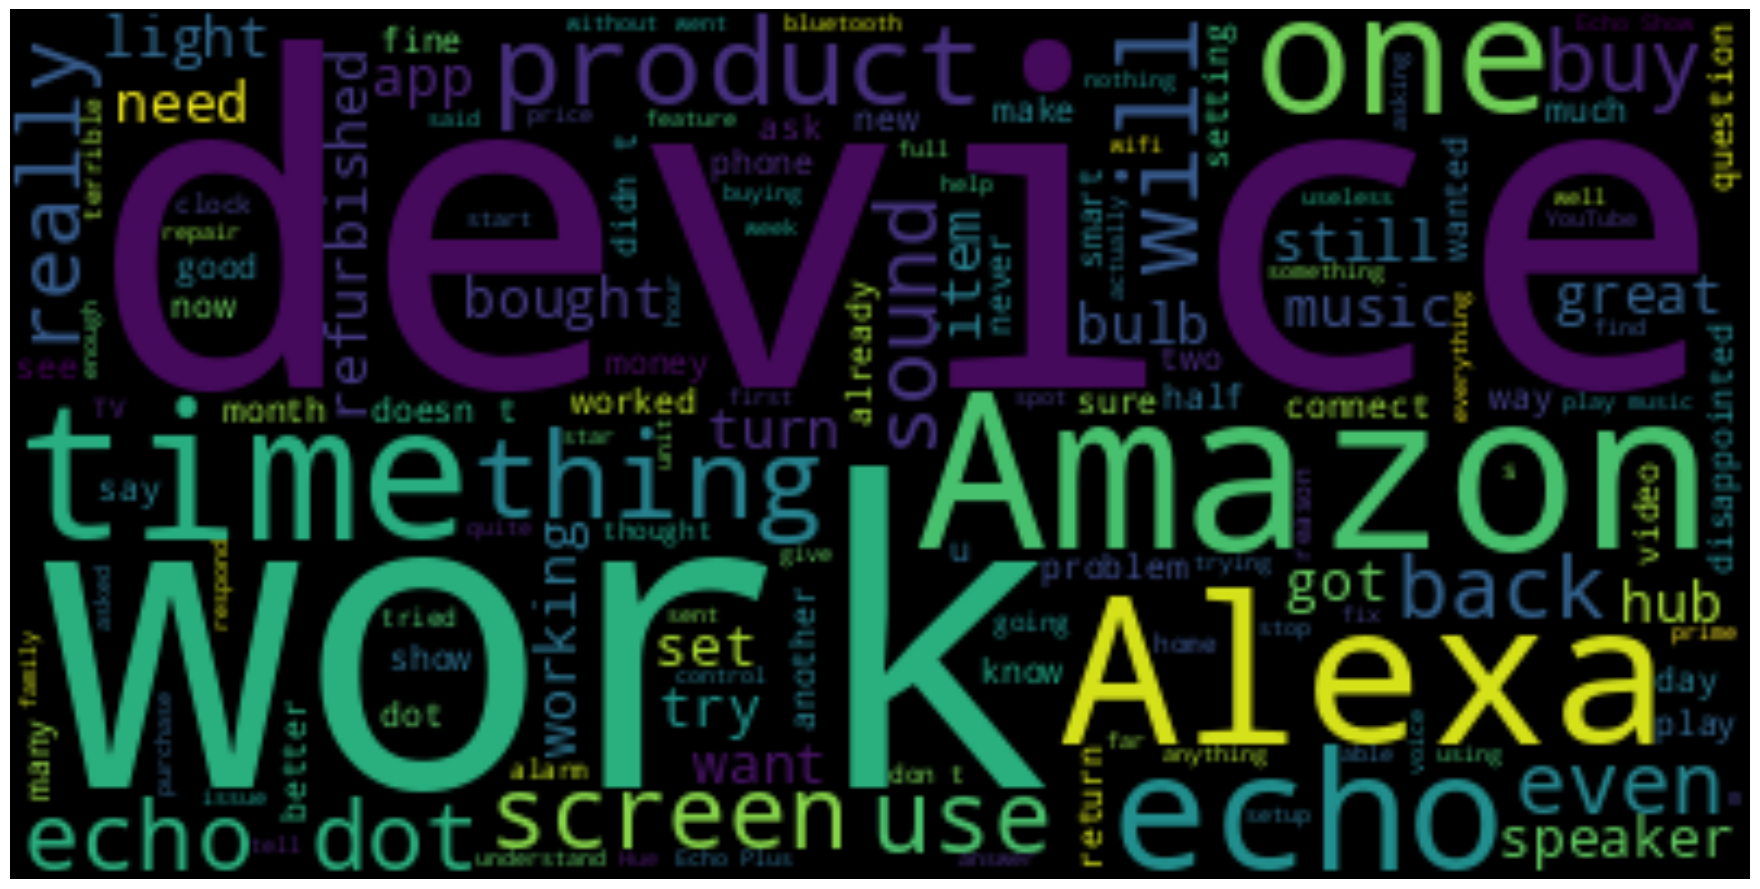

In [53]:
sentences = negative['verified_reviews'].astype(str).tolist()  # Convert all elements to strings
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))

# Generate the word cloud
wordcloud = WordCloud().generate(sentences_as_one_string)

# Display the word cloud without the axis
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis to remove the grid


plt.show()

In [54]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [58]:
import string  # Import the string module
from nltk.corpus import stopwords  # If you are using stopwords
import nltk
nltk.download('stopwords')  # Ensure that stopwords are downloaded

# Define the message_cleaning function
def message_cleaning(message):
    # Convert message to string to handle potential non-string values
    message = str(message)
    # Remove punctuation
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    # Remove stopwords
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

    # Join the cleaned words back into a single string
    cleaned_message = ' '.join(Test_punc_removed_join_clean)

    return cleaned_message

# Now apply the cleaning function to the 'verified_reviews' column
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

# Display the first few rows of the cleaned data
reviews_df_clean.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,verified_reviews
0,Love Echo
1,Loved
2,Sometimes playing game answer question correct...
3,lot fun thing 4 yr old learns dinosaurs contro...
4,Music


In [59]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [60]:
# show the cleaned up version
print(reviews_df_clean[5])

received echo gift needed another Bluetooth something play music easily accessible found smart speaker Can’t wait see else


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)

# Handle NaN values before fitting
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna('')  # Replace NaN with empty string

# Now fit and transform the cleaned data
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [64]:
print(vectorizer.get_feature_names_out())

[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y'
 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'á' 'é' 'í' 'ñ' 'ó' 'ú' '\u200b' '—'
 '‘' '’' '“' '”' '‼' '⏰' '❤' '⭐' '️' '🎶' '🏻' '🏾' '👍' '💋' '😁' '😂' '😄' '😉'
 '😊' '😍' '😎' '😏' '😑' '😔' '😥' '😬' '😳' '🤓']


In [65]:
print(reviews_countvectorizer.toarray())

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [16  0  0 ...  0  0  0]
 ...
 [41  0  0 ...  0  0  0]
 [36  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [66]:
reviews_countvectorizer.shape

(3150, 99)

In [67]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [68]:
X = reviews

In [69]:
y = reviews_df['feedback']
y

,feedback
0,1
1,1
2,1
3,1
4,1
...,...
3145,1
3146,1
3147,1
3148,1


TRAINING THE AI/ML MODEL

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

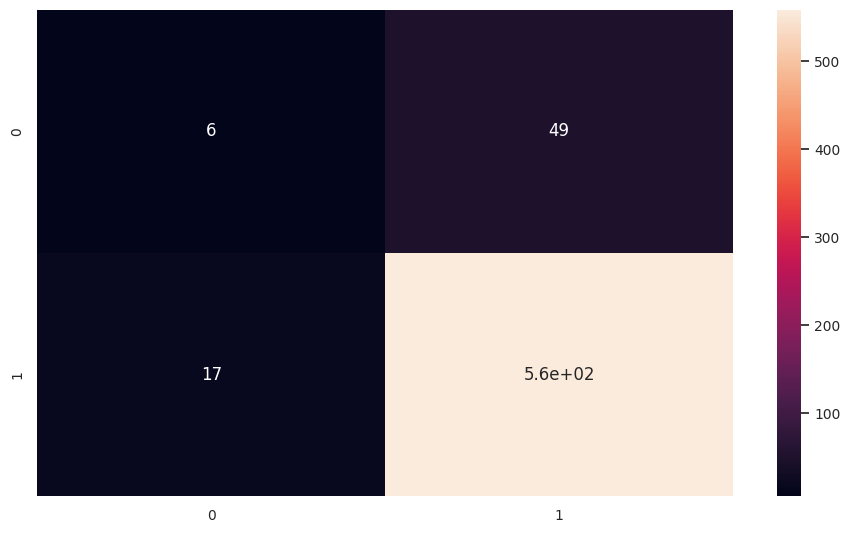

In [73]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [74]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.26      0.11      0.15        55
           1       0.92      0.97      0.94       575

    accuracy                           0.90       630
   macro avg       0.59      0.54      0.55       630
weighted avg       0.86      0.90      0.88       630



              precision    recall  f1-score   support

           0       0.62      0.09      0.16        55
           1       0.92      0.99      0.96       575

    accuracy                           0.92       630
   macro avg       0.77      0.54      0.56       630
weighted avg       0.89      0.92      0.89       630



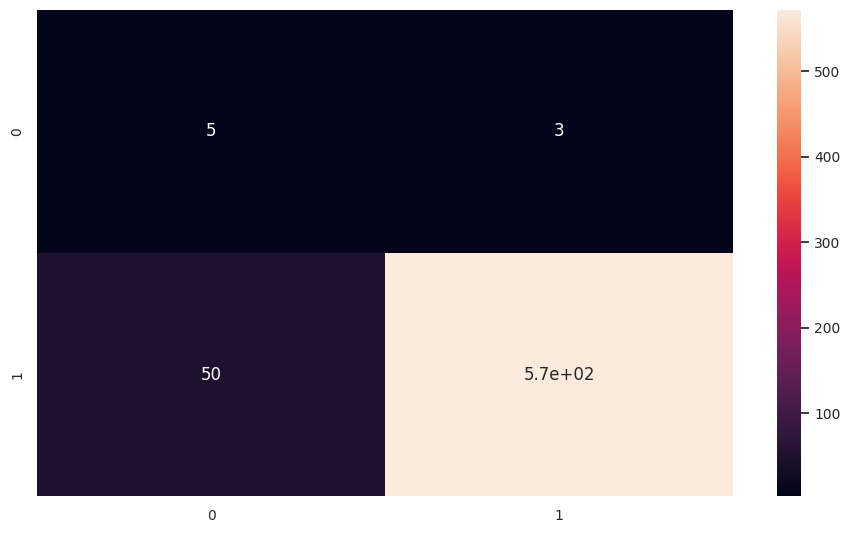

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))